1. Reading the CSV File:
- Load the provided CSV file into a pandas DataFrame.
- Display the first 5 rows of the DataFrame to understand the structure of the data.

In [9]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = '/kaggle/input/acc-players/acc_players-2324F.csv'
acc_data = pd.read_csv(file_path)

# Display the first 5 rows to ensure it's loaded correctly
acc_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


2. Basic Analysis:
- Calculate the total points scored by all players combined.
- Find the player who has played the most minutes (MP).
- Identify the top 5 players in terms of total rebounds (TRB).

In [10]:
# Cleaning up the column names
columns = [
    "Rk", "Player", "Class", "Pos", "School", "G", "MP", "TRB", "AST", "STL", "BLK", "TOV", 
    "PF", "PTS", "FG%", "2P%", "3P%", "FT%", "PER", "WS", "BPM"
]
acc_data.columns = columns

# Dropping the first row since it contains headers repeated
acc_data = acc_data.drop(0)

# Converting relevant columns to numeric types
acc_data["PTS"] = pd.to_numeric(acc_data["PTS"], errors="coerce")
acc_data["MP"] = pd.to_numeric(acc_data["MP"], errors="coerce")
acc_data["TRB"] = pd.to_numeric(acc_data["TRB"], errors="coerce")
acc_data["AST"] = pd.to_numeric(acc_data["AST"], errors="coerce")
acc_data["BLK"] = pd.to_numeric(acc_data["BLK"], errors="coerce")

# Calculate the total points scored by all players combined
total_points = acc_data["PTS"].sum()

# Find the player who has played the most minutes
most_minutes_player = acc_data.loc[acc_data["MP"].idxmax()]["Player"]

# Identify the top 5 players in terms of total rebounds (TRB)
top_5_rebounds = acc_data.nlargest(5, "TRB")[["Player", "TRB"]]

total_points, most_minutes_player, top_5_rebounds

(38411,
 'Casey Morsell',
               Player  TRB
 6      Armando Bacot  380
 179  Ian Schieffelin  340
 91   Harrison Ingram  327
 45    Mohamed Diarra  311
 150    Norchad Omier  309)

3. Player Filtering:
- Create a new DataFrame containing only players who played more than 500 minutes.
- From this filtered DataFrame, determine the player with the highest total assists (AST).
- Who are the top 3 Assist Leads in the League?
- Who are the top 3 Shot Blockers?

In [11]:
# Create a new DataFrame containing only players who played more than 500 minutes
filtered_players = acc_data[acc_data["MP"] > 500]

# Find the player with the highest total assists (AST) in the filtered DataFrame
highest_assists_player = filtered_players.loc[filtered_players["AST"].idxmax()]["Player"]

# Top 3 assist leaders in the league
top_3_assist_leaders = filtered_players.nlargest(3, "AST")[["Player", "AST"]]

# Top 3 shot blockers
top_3_blockers = filtered_players.nlargest(3, "BLK")[["Player", "BLK"]]

highest_assists_player, top_3_assist_leaders, top_3_blockers


('Reece Beekman',
              Player  AST
 8     Reece Beekman  212
 216  Jaeden Zackery  152
 22    Elliot Cadeau  150,
             Player  BLK
 52       Ryan Dunn   77
 158   Quinten Post   61
 6    Armando Bacot   56)

4. School-Based Analysis:
- Group the players by School and calculate the total points scored by each school.
- Group the players by School and calculate the total assists (AST) for each team.
- Sort the schools by total points scored and display the top 3 schools.

In [12]:
# Group the players by School and calculate the total points scored by each school
school_total_points = acc_data.groupby("School")["PTS"].sum().sort_values(ascending=False)

# Group the players by School and calculate the total assists (AST) for each team
school_total_assists = acc_data.groupby("School")["AST"].sum().sort_values(ascending=False)

# Sort the schools by total points scored and display the top 3 schools
top_3_schools = school_total_points.head(3)

school_total_points, school_total_assists, top_3_schools


(School
 NC State          3101
 North Carolina    3032
 Duke              2830
 Clemson           2785
 Wake Forest       2733
 Boston College    2667
 Virginia Tech     2547
 Florida State     2526
 Pittsburgh        2495
 Syracuse          2442
 Miami (FL)        2424
 Louisville        2304
 Georgia Tech      2272
 Virginia          2140
 Notre Dame        2113
 Name: PTS, dtype: int64,
 School
 Duke              551
 NC State          536
 North Carolina    536
 Clemson           533
 Virginia Tech     514
 Boston College    509
 Virginia          509
 Miami (FL)        454
 Pittsburgh        452
 Syracuse          442
 Wake Forest       429
 Georgia Tech      425
 Florida State     406
 Louisville        356
 Notre Dame        335
 Name: AST, dtype: int64,
 School
 NC State          3101
 North Carolina    3032
 Duke              2830
 Name: PTS, dtype: int64)

5. Extra Credit (Bonus):
- Create a bar chart showing the top 5 players by total points scored (PTS).
- Correlation: Investigate whether there is any correlation between a player's field goal percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the correlation coefficient.

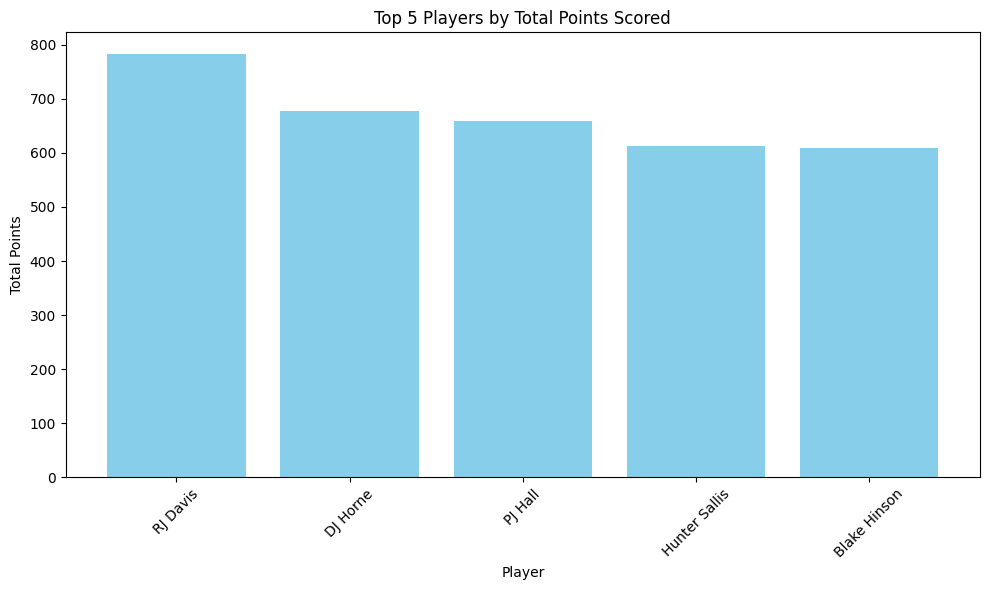

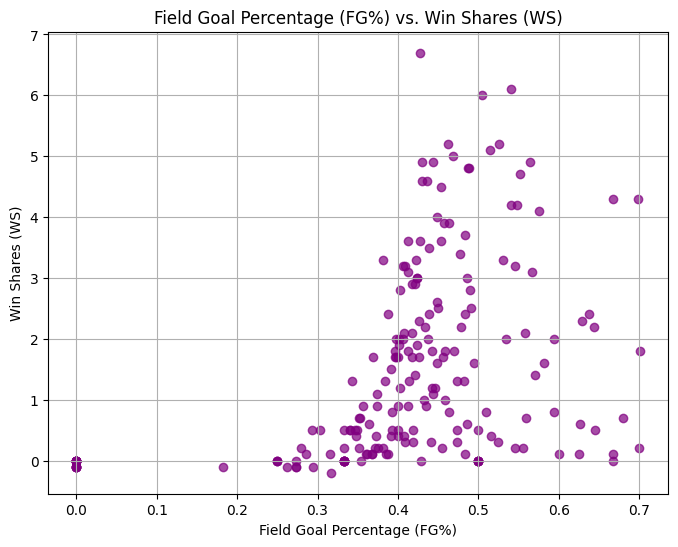

0.4210663894199787

In [13]:
import matplotlib.pyplot as plt

# Bar chart showing the top 5 players by total points scored (PTS)
top_5_points = acc_data.nlargest(5, "PTS")[["Player", "PTS"]]

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(top_5_points["Player"], top_5_points["PTS"], color='skyblue')
plt.title("Top 5 Players by Total Points Scored")
plt.xlabel("Player")
plt.ylabel("Total Points")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Correlation analysis: Field goal percentage (FG%) vs. Win Shares (WS)
# Convert FG% and WS to numeric values
acc_data["FG%"] = pd.to_numeric(acc_data["FG%"], errors="coerce")
acc_data["WS"] = pd.to_numeric(acc_data["WS"], errors="coerce")

# Scatter plot of FG% vs. WS
plt.figure(figsize=(8,6))
plt.scatter(acc_data["FG%"], acc_data["WS"], alpha=0.7, color='purple')
plt.title("Field Goal Percentage (FG%) vs. Win Shares (WS)")
plt.xlabel("Field Goal Percentage (FG%)")
plt.ylabel("Win Shares (WS)")
plt.grid(True)

# Show the scatter plot
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = acc_data["FG%"].corr(acc_data["WS"])
correlation_coefficient


**What did you learn about working with CSV files and pandas DataFrames in this assignment?**
In this assignment, I learned how to effectively read and manipulate CSV files using pandas DataFrames. This included loading data, inspecting the structure, and performing a variety of tasks such as filtering, grouping, and summarizing data. I developed skills in basic exploratory data analysis, such as identifying key players and teams based on specific statistics. Additionally, I learned how to visualize data through bar charts and scatter plots, which provided valuable insights into the relationships between variables. These skills will be critical for future data analysis projects, enabling me to work efficiently with different datasets and perform insightful analyses.

**What was the most challenging aspect of this assignment, and how did you overcome it?**
The most challenging aspect of this assignment was dealing with data inconsistencies in the CSV file, such as missing values and incorrectly labeled columns. Initially, this made it difficult to directly analyze the dataset. I overcame this challenge by cleaning the data, renaming columns, and converting the necessary fields into the correct data types. Another challenge was interpreting the data correctly, especially when filtering players by specific criteria like minutes played or calculating correlations. I tackled these challenges through step-by-step troubleshooting and verifying each stage of analysis to ensure accuracy.

**How do you think the insights gained from analyzing ACC basketball statistics could be applied to other real-world datasets?**
The insights gained from analyzing ACC basketball statistics can be applied to various real-world datasets in fields such as business, healthcare, and sports analytics. The ability to filter, group, and visualize data to identify key trends is a universal skill that can inform decision-making in any industry. For instance, similar analysis techniques could be used in healthcare to evaluate patient outcomes, or in business to track key performance indicators. This experience has prepared me to approach future data science challenges with confidence, knowing that the same principles of data manipulation and analysis can be applied to a wide range of datasets.